<a href="https://colab.research.google.com/github/DinhKhoi2509/2001230416_nguyendinhkhoi/blob/main/2001230416_nguyendinhkhoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tâm cụm cuối cùng:
 [[2.05583099 2.02515176]
 [8.9916203  2.00530217]
 [3.95521809 9.10033834]]
Số lần lặp: 5


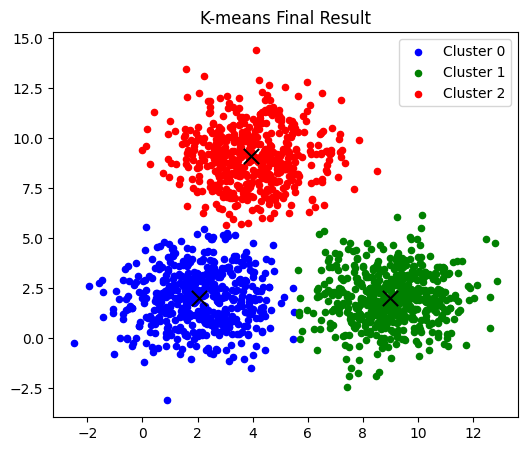

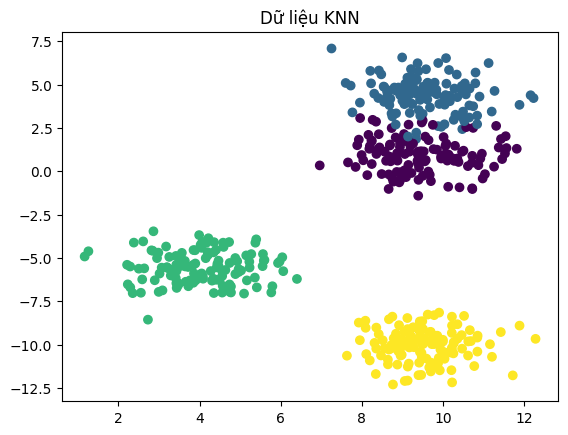

Giá trị k tối ưu: 2
Manual KNN dự đoán: [0]
Nhập số cụm k cho DEMO K-means = 1


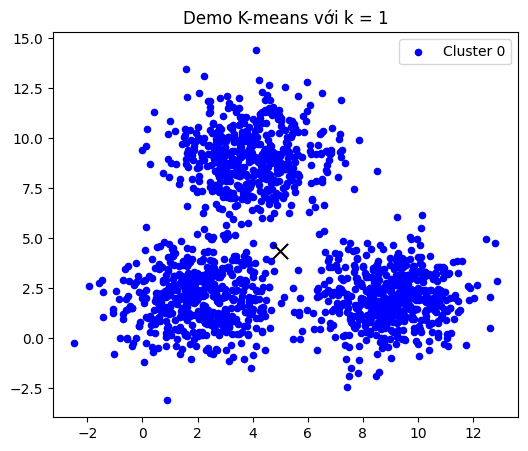

Nhập điểm cần phân lớp KNN:
x = 5
y = 7


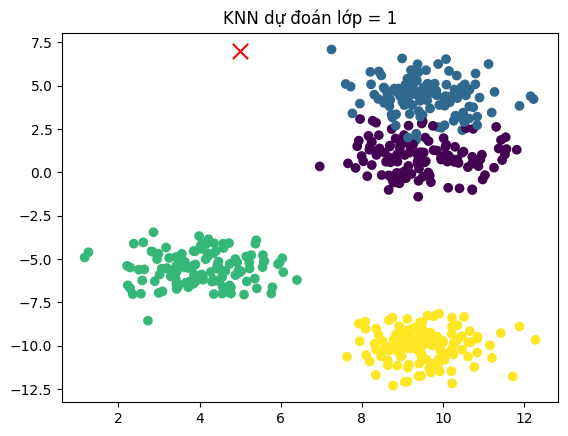


===== ỨNG DỤNG THỰC TẾ CỦA K-MEANS =====

1. Phân nhóm khách hàng (Customer Segmentation)
2. Nén ảnh (Image Compression)
3. Phát hiện bất thường (Anomaly Detection)


===== ỨNG DỤNG THỰC TẾ CỦA KNN =====

1. Nhận dạng chữ viết tay
2. Phân loại bệnh
3. Gợi ý sản phẩm (Recommendation)


===== BÀI 4 & 5 ĐÃ HOÀN THÀNH (DEMO + LÝ THUYẾT) =====


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


# ============================================================
#                         BÀI 1
#                 CÀI ĐẶT THUẬT TOÁN K-MEANS
# ============================================================

def kmeans_init_centers(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_predict_labels(X, centers):
    D = cdist(X, centers)
    return np.argmin(D, axis=1)

def kmeans_update_centers(X, labels, k):
    centers = np.zeros((k, X.shape[1]))
    for i in range(k):
        Xi = X[labels == i]
        centers[i] = Xi.mean(axis=0)
    return centers

def kmeans_has_converged(c_old, c_new):
    return set([tuple(a) for a in c_old]) == set([tuple(a) for a in c_new])

def kmeans_visualize(X, centers, labels, k, title):
    colors = ['b','g','r','c','m','y','k']
    plt.figure(figsize=(6,5))
    plt.title(title)
    for i in range(k):
        plt.scatter(X[labels == i][:,0], X[labels == i][:,1],
                    s=20, c=colors[i], label=f"Cluster {i}")
        plt.scatter(centers[i][0], centers[i][1], c='black', s=120, marker='x')
    plt.legend()
    plt.show()

def kmeans(X, k):
    centers = kmeans_init_centers(X, k)
    labels = np.zeros(X.shape[0])
    iterations = 0

    while True:
        labels = kmeans_predict_labels(X, centers)
        new_centers = kmeans_update_centers(X, labels, k)

        if kmeans_has_converged(centers, new_centers):
            break

        centers = new_centers
        iterations += 1

    return centers, labels, iterations


# ------------------ TEST K-MEANS --------------------
means = [[2,2],[9,2],[4,9]]
cov = [[2,0],[0,2]]

X0 = np.random.multivariate_normal(means[0], cov, 500)
X1 = np.random.multivariate_normal(means[1], cov, 500)
X2 = np.random.multivariate_normal(means[2], cov, 500)
X_kmeans = np.concatenate((X0, X1, X2))

centers, labels, times = kmeans(X_kmeans, 3)
print("Tâm cụm cuối cùng:\n", centers)
print("Số lần lặp:", times)

kmeans_visualize(X_kmeans, centers, labels, 3, "K-means Final Result")



# ============================================================
#                         BÀI 2
#                  CÀI ĐẶT THUẬT TOÁN KNN
# ============================================================

def KNN_manual(X_train, X_test, y_train, k):
    num_test = X_test.shape[0]
    num_train = X_train.shape[0]
    distances = np.zeros((num_test, num_train))

    for i in range(num_test):
        for j in range(num_train):
            distances[i, j] = np.sqrt(np.sum((X_test[i] - X_train[j])**2))

    results = []
    for i in range(num_test):
        zipped = list(zip(distances[i], y_train))
        sorted_k = sorted(zipped, key=lambda x: x[0])[:k]

        count = {}
        for _, label in sorted_k:
            count[int(label)] = count.get(int(label), 0) + 1

        results.append(max(count, key=count.get))
    return np.array(results)


# ------------------- Create dataset -------------------------
X_knn, y_knn = make_blobs(n_samples=500, n_features=2, centers=4,
                          cluster_std=1, random_state=4)

plt.scatter(X_knn[:,0], X_knn[:,1], c=y_knn)
plt.title("Dữ liệu KNN")
plt.show()

# ------------------- GridSearchCV tìm k ----------------------
knn_grid = GridSearchCV(estimator=KNeighborsClassifier(),
                        param_grid={'n_neighbors': np.arange(1,10)}, cv=5)

knn_grid.fit(X_knn, y_knn)
best_k = knn_grid.best_params_['n_neighbors']

print("Giá trị k tối ưu:", best_k)

# ------------------- Test manual KNN -------------------------
X_test_manual = np.array([[1, 3]])
result = KNN_manual(X_knn, X_test_manual, y_knn, best_k)
print("Manual KNN dự đoán:", result)



# ============================================================
#                         BÀI 3
# ============================================================

# ---------- Demo K-means ----------
k = int(input("Nhập số cụm k cho DEMO K-means = "))
centers_demo, labels_demo, _ = kmeans(X_kmeans, k)
kmeans_visualize(X_kmeans, centers_demo, labels_demo, k,
                 f"Demo K-means với k = {k}")

# ---------- Demo KNN ----------
print("Nhập điểm cần phân lớp KNN:")
px = float(input("x = "))
py = float(input("y = "))

point = np.array([[px, py]])
predict_label = KNN_manual(X_knn, point, y_knn, best_k)

plt.scatter(X_knn[:,0], X_knn[:,1], c=y_knn)
plt.scatter(px, py, c='red', s=120, marker='x')
plt.title(f"KNN dự đoán lớp = {predict_label[0]}")
plt.show()



# ============================================================
#                     BÀI 4 & BÀI 5
# ============================================================

print("\n===== ỨNG DỤNG THỰC TẾ CỦA K-MEANS =====")
print("""
1. Phân nhóm khách hàng (Customer Segmentation)
2. Nén ảnh (Image Compression)
3. Phát hiện bất thường (Anomaly Detection)
""")

print("\n===== ỨNG DỤNG THỰC TẾ CỦA KNN =====")
print("""
1. Nhận dạng chữ viết tay
2. Phân loại bệnh
3. Gợi ý sản phẩm (Recommendation)
""")

print("\n===== BÀI 4 & 5 ĐÃ HOÀN THÀNH (DEMO + LÝ THUYẾT) =====")
